学年クラス：3C　学籍番号：b2181930　氏名：西村貴志

***
# 演習1.
MNISTのデータは、手書きで書かれた数字の画像データと、その画像に書かれた数字を表すラベルから構成されている。また、訓練データが6万枚、テストデータ1万枚ある。データがきれいに成形されており、精度が出やすい。
***

In [1]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
data_train = digits.images
label_train = digits.target

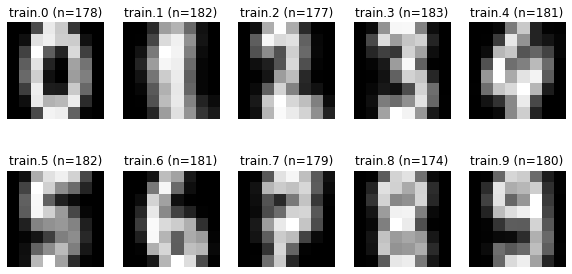

In [3]:
mean_images = np.zeros((10,8,8))
fig = plt.figure(figsize=(10,5))
for i in range(10):
  mean_images[i] = data_train[label_train==i].mean(axis=0)
  ax = fig.add_subplot(2, 5, i+1)
  ax.axis('off')
  ax.set_title('train.{0} (n={1})'.format(i, len(data_train[label_train==i])))
  ax.imshow(mean_images[i],cmap=plt.cm.gray, interpolation='none')
plt.show()

***
# 演習2.
***

In [4]:
from PIL import Image
pil_images = []
for i in range(10):
  pil_image = Image.open('mytest\\mytest_' + str(i) + '.png').convert('L')
  pil_images.append(pil_image)

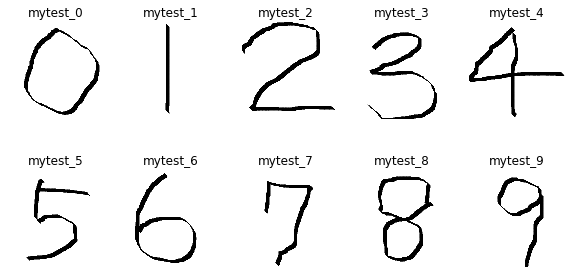

In [5]:
fig = plt.figure(figsize=(10,5))
for i in range(10):
  ax = fig.add_subplot(2, 5, i+1)
  ax.axis('off')
  ax.set_title('mytest_{}'.format(i))
  ax.imshow(pil_images[i],cmap=plt.cm.gray, interpolation='none')

plt.show()

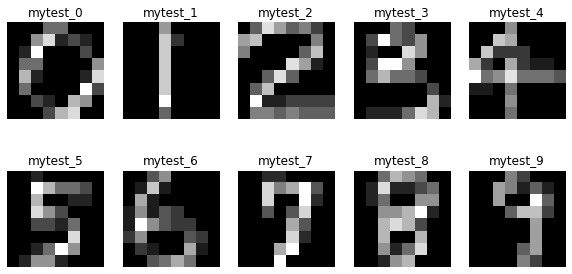

In [6]:
pil_images = []
for i in range(10):
  pil_image = Image.open('mytest\\mytest_' + str(i) + '.png').convert('L')
  pil_image_resize = pil_image.resize((8, 8), Image.LANCZOS)
  pil_images.append(pil_image)

test_data = np.empty((10, 8, 8), dtype=float)
for i in range(10):
  pil_image_resize = pil_images[i].resize((8, 8), Image.LANCZOS)
  test_data[i] = np.array(pil_image_resize, dtype=float)
  test_data[i] = 16 - np.floor(17 * test_data[i] / 256)

fig = plt.figure(figsize=(10,5))
for i in range(10):
  ax = fig.add_subplot(2, 5, i+1)
  ax.axis('off')
  ax.set_title('mytest_{}'.format(i))
  ax.imshow(test_data[i],cmap=plt.cm.gray, interpolation='none')
plt.show()

In [7]:
from sklearn import datasets, svm, metrics
from PIL import Image

digits = datasets.load_digits()
data_train = digits.images.reshape((digits.images.shape[0],-1))
label_train = digits.target

pil_images = []
for i in range(10):
  pil_image = Image.open('mytest\\mytest_' + str(i) + '.png').convert('L')
  pil_image_resize = pil_image.resize((8, 8), Image.LANCZOS)
  pil_images.append(pil_image)

test_data = np.empty((10, 8, 8), dtype=float)
for i in range(10):
  pil_image_resize = pil_images[i].resize((8, 8), Image.LANCZOS)
  test_data[i] = np.array(pil_image_resize, dtype=float)
  test_data[i] = 16 - np.floor(17 * test_data[i] / 256)
test_data = test_data.reshape((test_data.shape[0],-1))
label_test = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
clf = svm.SVC(gamma=0.001, C=10.0)
clf.fit(data_train, label_train)

SVC(C=10.0, gamma=0.001)

In [9]:
predict = clf.predict(test_data)
print('テストラベル（正解の数字）')
print(label_test)
print('解析結果（識別した数字）')
print(predict)
ac_score = metrics.accuracy_score(label_test, predict)
print("正解率{}%".format(ac_score*100))

テストラベル（正解の数字）
[0 1 2 3 4 5 6 7 8 9]
解析結果（識別した数字）
[9 1 8 9 4 5 5 7 8 9]
正解率60.0%


***
# 演習3.
以下の結果から、文字が傾いていると1つも正解できずうまく推論できていないこと、太くしっかりと書くと正解率が60%から90%に上がっていることがわかる。

In [10]:
def print_images(path: str = ''):
  _pil_images = []
  for i in range(10):
    _pil_image = Image.open(path + str(i) + '.png').convert('L')
    _pil_images.append(_pil_image)
  _fig = plt.figure(figsize=(10,5))
  for i in range(10):
    _ax = _fig.add_subplot(2, 5, i+1)
    _ax.axis('off')
    _ax.set_title(path + str(i))
    _ax.imshow(_pil_images[i],cmap=plt.cm.gray, interpolation='none')
  plt.show()

def load_images(path: str = ''):
  _pil_images = []
  for i in range(10):
    _pil_image = Image.open(path + str(i) + '.png').convert('L')
    _pil_image_resize = _pil_image.resize((8, 8), Image.LANCZOS)
    _pil_images.append(_pil_image)
  _test_data = np.empty((10, 8, 8), dtype=float)
  for i in range(10):
    _pil_image_resize = _pil_images[i].resize((8, 8), Image.LANCZOS)
    _test_data[i] = np.array(_pil_image_resize, dtype=float)
    _test_data[i] = 16 - np.floor(17 * _test_data[i] / 256)
  _test_data = _test_data.reshape((_test_data.shape[0],-1))
  return _test_data

def print_result(label, pred):
  print('テストラベル（正解の数字）')
  print(label)
  print('解析結果（識別した数字）')
  print(pred)
  print("正解率{}%".format(metrics.accuracy_score(label, pred)*100))

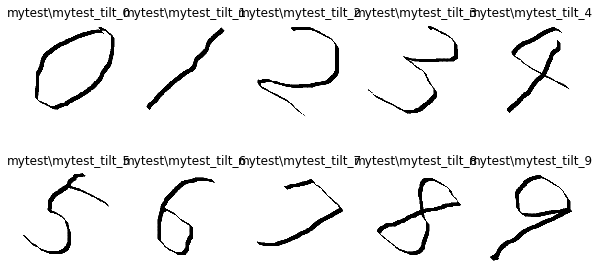

傾いた文字
テストラベル（正解の数字）
[0 1 2 3 4 5 6 7 8 9]
解析結果（識別した数字）
[4 7 4 1 7 7 5 4 7 7]
正解率0.0%


In [11]:
print_images('mytest\\mytest_tilt_')
test_data = load_images('mytest\\mytest_tilt_')
predict = clf.predict(test_data)
print('傾いた文字')
print_result(label_test, predict)

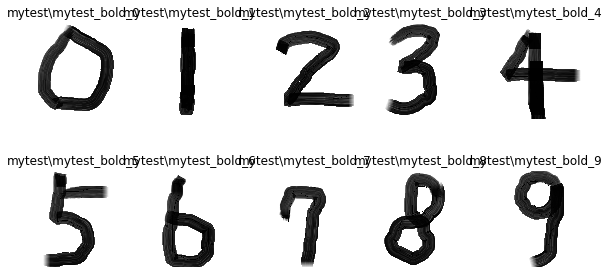

太い文字
テストラベル（正解の数字）
[0 1 2 3 4 5 6 7 8 9]
解析結果（識別した数字）
[0 1 2 3 4 5 6 1 8 9]
正解率90.0%


In [12]:
print_images('mytest\\mytest_bold_')
test_data = load_images('mytest\\mytest_bold_')
predict = clf.predict(test_data)
print('太い文字')
print_result(label_test, predict)

***